# PZ-7_Community
## Изучение реализаций алгоритма Louvain

### Задание для подготовки к ПЗ-7:
1) Ознакомиться с содержимым папки Louvain и установить в среде Анаконды пакет louvain-igraph.

Обратите внимание на предупреждение: 
This package has been superseded by the leidenalg package and will no longer be maintained.

### Задание на ПЗ-7:
1. Сравнение реализаций алгоритма в пакетах IGraph и Python-Louvain (leidenalg) на простом невзвешенном графе (для сравнения использовать тестовый граф, созданный на ПЗ-6 (см. файл "ig_test_graph_2.gml"):
- для визуализации сообществ использовать функцию, разработанную на ПЗ-6
- провести выделение сообществ с помощью функций ig.community_multilevel(G) и    leidenalg.find_partition(G, leidenalg.ModularityVertexPartition)
- измерить среднее время выполнения задачи (в цикле длиной 100 прогонов)
- сравнить получившиеся сообщества
- визуализировать результаты выделения сообществ

2. Сравнение реализаций алгоритма в пакетах IGraph и Python-Louvain (leidenalg) на простом графе с взвешенными рёбрами:
- создать новый тестовый граф путём добавления каждому ребру атрибута "weight" (веса случайные целые числа в диапазоне 1-20)
- повторить действия п.1

4. Повторить запуск функции функции leidenalg.find_partition  для следующих вариантов значений аргумента "partition_type" (использовать тестовый граф, созданный из файла "ig_test_graph_2.gml"):
- RBConfigurationVertexPartition
- RBERVertexPartition
- CPMVertexPartition
- SignificanceVertexPartition
- SurpriseVertexPartitionэ

5. сравнить получившиеся сообщества с результатом, полученным при запуске leidenalg.find_partition(G, leidenalg.ModularityVertexPartition

In [43]:
import igraph as ig
import leidenalg
import time
import random as r

In [35]:
def benchmark(func):    
    def wrapper(*args, **kwargs):
        start = time.time()
        return_value = func(*args, **kwargs)
        end = time.time()
        print(f'Время выполнения: {end-start} секунд.')
        return return_value
    return wrapper

def get_color(count):
    return [(r.random(), r.random(), r.random(),) for _ in range(count)]

@benchmark
def draw_graph(G, clusters):
    colour_map = get_color(len(clusters))
    layout = G.layout("kk")
    print(f"Nodes count: {G.vcount()}")
    print(f"Edges count: {G.ecount()}")

    return ig.plot(G, layout=layout, vertex_color = [colour_map[color] for color in clusters.membership])

def meter(count, func, *args):
    start = time.time()
    for _ in range(0, count):
        func(*args)
    print(f'Прошло {str(time.time() - start)} секунд')

In [24]:
G = ig.read("ig_test_graph_2.gml")

Nodes count: 118
Edges count: 1145
Время выполнения: 0.003969430923461914 секунд.


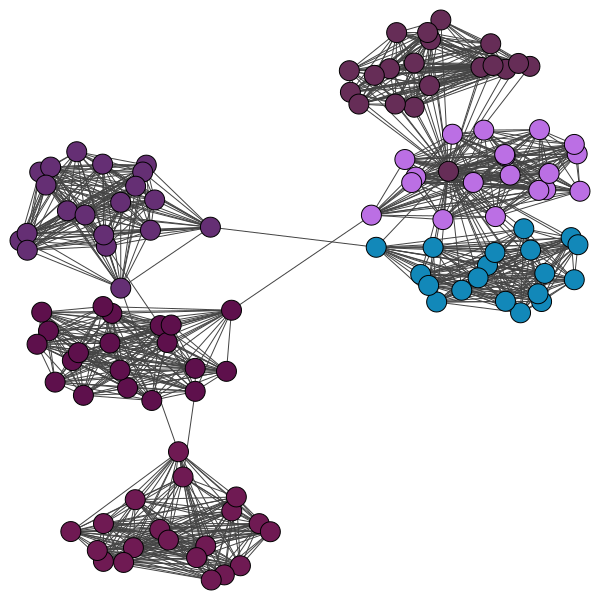

In [33]:
draw_graph(G, leidenalg.find_partition(G, leidenalg.ModularityVertexPartition))

Nodes count: 118
Edges count: 1145
Время выполнения: 0.00501561164855957 секунд.


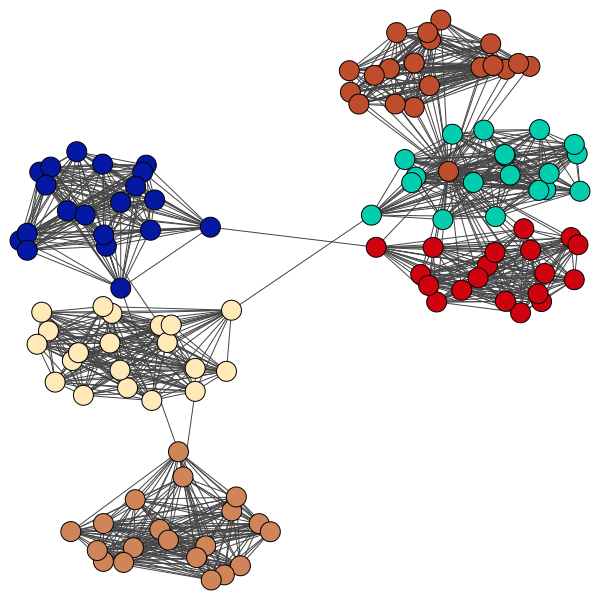

In [34]:
draw_graph(G, ig.Graph.community_multilevel(G))

In [37]:
meter(100, ig.Graph.community_multilevel, G)

Прошло 0.03284883499145508 секунд


In [38]:
meter(100, leidenalg.find_partition, G, leidenalg.ModularityVertexPartition)

Прошло 0.08730101585388184 секунд


Nodes count: 118
Edges count: 1145
Время выполнения: 0.005001068115234375 секунд.


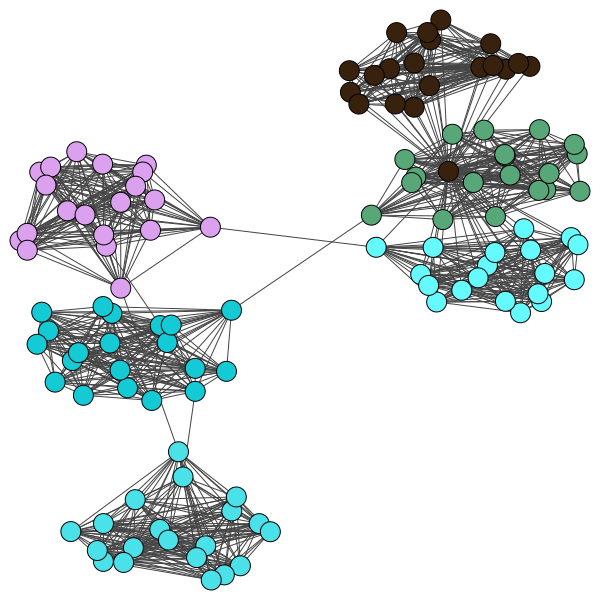

In [39]:
draw_graph(G, leidenalg.find_partition(G, leidenalg.RBConfigurationVertexPartition))

Nodes count: 118
Edges count: 1145
Время выполнения: 0.004967689514160156 секунд.


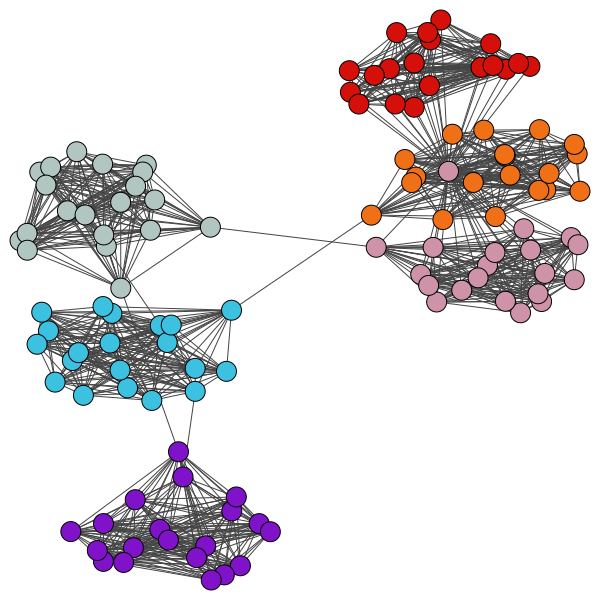

In [40]:
draw_graph(G, leidenalg.find_partition(G, leidenalg.RBERVertexPartition))

Nodes count: 118
Edges count: 1145
Время выполнения: 0.004998207092285156 секунд.


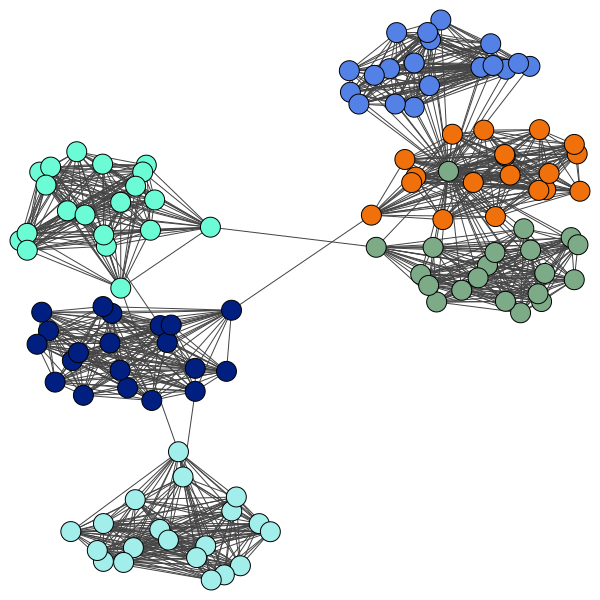

In [41]:
draw_graph(G, leidenalg.find_partition(G, leidenalg.SignificanceVertexPartition))

Nodes count: 118
Edges count: 1145
Время выполнения: 0.006000041961669922 секунд.


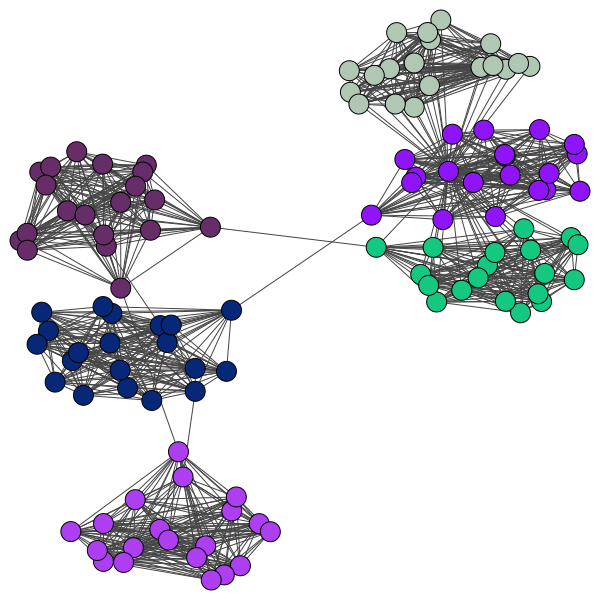

In [42]:
draw_graph(G, leidenalg.find_partition(G, leidenalg.SurpriseVertexPartition))

Результаты работы сохранить в файле PZ-7(N)21.11.20.ipynb , где N- порядковый номер по журналу. Файл должен содержать комментарии, поясняющие выполненные действия.